In [ ]:
#Figure 6 graph plotting 
#v1.0 version, this is the first consolidation of analysis done so far
#Requires the environment packages found in 23pubenv

In [1]:
import tifffile
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

In [2]:
um_per_px = 2.2
px_to_mm = um_per_px/1000.0 #um/px --> mm/px

def read_tuple_list(x):
    x_strip = x.strip('()').strip('[]')
    if len(x_strip.split(', ')) == 1:
        return np.array(x_strip.split(), dtype=float)
    else:
        return np.array(x_strip.split(', '), dtype=float)

In [3]:
#folder_path = '/media/echo/Samsung_T5/Main Data/Analysis Sets/23 Protofigures/Fig4 - Accumulation Metrics/kinetic analysis'
folder_path = Path.cwd().parent / 'Fig4 - Accumulation Metrics/kinetic analysis'

folder = Path(folder_path)
analysis_folders = list(folder.glob('[!.]*'))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2, 'font.family': ['arial'], 'axes.linewidth':2})

In [4]:

kinetic_accumulation_unique_ID_DF = pd.read_csv('fig4-supplement_accumulation_over_time.csv')



In [5]:
accumulation_ex_hi = kinetic_accumulation_unique_ID_DF[kinetic_accumulation_unique_ID_DF['unique_ID'] == '8-10m-1']



In [42]:
base_path = Path.cwd().parent / 'Data Sets/2023_01_24_main-set'
images_folder = base_path / 'images'
analysis_output_destination = base_path / 'wavefit_outputs'


image_num_hi = str(65)

wave_df_hi = pd.read_csv(analysis_output_destination / '{}_wave_df.csv'.format(image_num_hi), converters={"wave_centroid": read_tuple_list})
img_file_hi = tifffile.imread(images_folder / str(image_num_hi + '.tif'))

In [7]:
#Compile as coords, get the linear velocity vectors, radial vectors, distance from center of the wave, velocity, angle between velocity and center radius, Chemotactic index, and radial velocity:
clIDs_hi = wave_df_hi.clTrackID.values


event_sizes_hi = []
event_start_stops_hi = []
event_areas_hi = []

for clID, clEvent in wave_df_hi.groupby('clTrackID'):

    event_start_stops_hi.append((np.min(clEvent.timepoint.values), np.max(clEvent.timepoint.values)))
    event_areas_hi.append(np.pi*(clEvent.circle_radius.max()**2))
    event_sizes_hi.append(clEvent.circle_radius.max())


Text(0, 0.5, '')

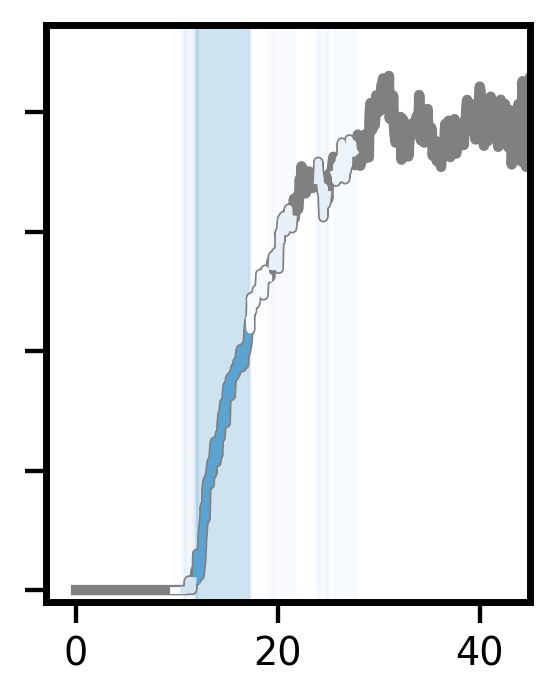

In [8]:
norma = plt.Normalize(25000, 300000)
#palette = LinearSegmentedColormap.from_list('what', ['#4B4B4B', '#DBD08F','#BC2313'])
palette = sns.color_palette("Blues",as_cmap=True)
colors_hi = [palette(norma(size)) for size in event_areas_hi]

fig, ax1 = plt.subplots(figsize=(2.5,3), dpi=250)
ax1.plot(accumulation_ex_hi.time,accumulation_ex_hi.accumulation, 'grey', linewidth=3)

y_scale = max(accumulation_ex_hi.accumulation) * 1.1

for clID, clr, strstp in zip(clIDs_hi, colors_hi, event_start_stops_hi):
    rel_time = np.array(accumulation_ex_hi.time.values[strstp[0]:strstp[1]])
    rel_rad_coll = np.array(accumulation_ex_hi.accumulation.values[strstp[0]:strstp[1]])
    ax1.plot(rel_time,rel_rad_coll, color=clr, linewidth=2)
    ax1.fill_betweenx([-1000,y_scale], (5.0/60.0)*(strstp[0]), (5.0/60.0)*(strstp[1]), alpha=0.3, color=clr)


#plt.vlines(wave_start_times_real, ymin=-2, ymax=40000, linestyles='--', colors='grey')
plt.xlim(-3,45)
plt.ylim(-10,y_scale)
#plt.colorbar(cm.ScalarMappable(norm=norma, cmap=palette))
ax1.tick_params(axis='y', labelleft = False)
plt.xlabel('')
plt.ylabel('')
#plt.savefig('fig4-65-accumulation-time-w-wave-area-highlight.png', dpi=300, bbox_inches='tight')

In [37]:
wave.circle_radius.max()

157.49986976528805

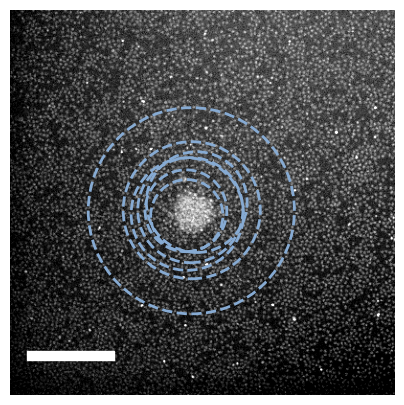

In [87]:

fig,axes = plt.subplots(figsize=(5,5))

norma = plt.Normalize(25000, 300000)
#palette = LinearSegmentedColormap.from_list('what', ['#4B4B4B', '#DBD08F','#BC2313'])
palette = sns.color_palette("Blues",as_cmap=True)
plt.imshow(img_file_hi[-1, 1, :,:], cmap='Greys_r', vmin=400, vmax=900)

for wid, wave in wave_df_hi.groupby('clTrackID'):
    wave_area = np.pi*(wave.circle_radius.max()**2)
    circle_wave = plt.Circle(wave.wave_centroid.values[0], wave.circle_radius.max()/um_per_px, color='#87ABD3', fill=False, linestyle='--', linewidth=2)
    axes.add_patch(circle_wave)
    
plt.gca().invert_yaxis()
scalebar = AnchoredSizeBar(axes.transData,
                           200/um_per_px, '',  'lower left', 
                           pad=1,
                           color='white',
                           frameon=False,
                           size_vertical=10)

axes.add_artist(scalebar)
axes.axis('off')
plt.savefig('supp6a-high-den.png', dpi=300, bbox_inches='tight')


In [11]:
wave_df_hi.groupby('clTrackID').get_group(21).circle_radius.max()

157.49986976528805

In [49]:
accumulation_ex_lo = kinetic_accumulation_unique_ID_DF[kinetic_accumulation_unique_ID_DF['unique_ID'] == '8-3m-1']

In [50]:

image_num_lo = str(69)

wave_df_lo = pd.read_csv(analysis_output_destination / '{}_wave_df.csv'.format(image_num_lo), converters={"wave_centroid": read_tuple_list})
img_file_lo = tifffile.imread(images_folder / str(image_num_lo + '.tif'))

In [51]:
#Compile as coords, get the linear velocity vectors, radial vectors, distance from center of the wave, velocity, angle between velocity and center radius, Chemotactic index, and radial velocity:
clIDs_lo = wave_df_lo.clTrackID.values


event_sizes_lo = []
event_start_stops_lo = []
event_areas_lo = []

for clID, clEvent in wave_df_lo.groupby('clTrackID'):

    event_start_stops_lo.append((np.min(clEvent.timepoint.values), np.max(clEvent.timepoint.values)))
    event_areas_lo.append(np.pi*(clEvent.circle_radius.max()**2))
    event_sizes_lo.append(clEvent.circle_radius.max())


Text(0, 0.5, '')

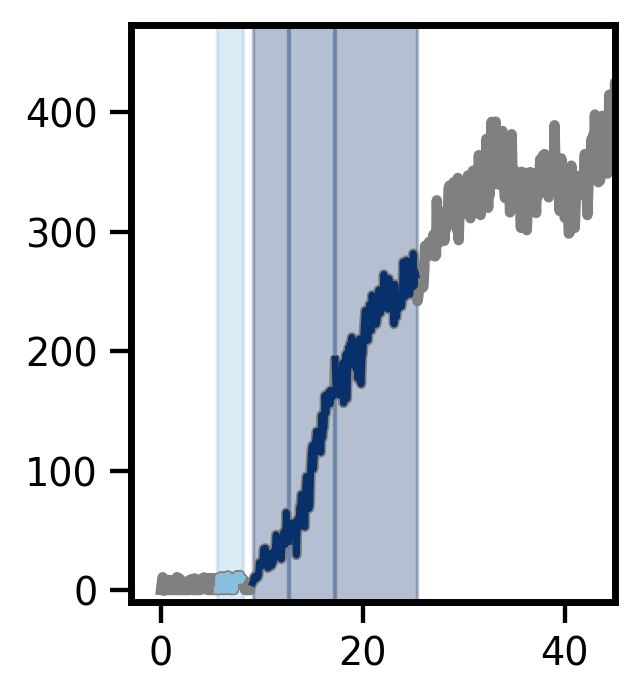

In [52]:
norma = plt.Normalize(25000, 300000)
#palette = LinearSegmentedColormap.from_list('what', ['#4B4B4B', '#DBD08F','#BC2313'])
palette = sns.color_palette("Blues",as_cmap=True)
colors_lo = [palette(norma(size)) for size in event_areas_lo]

fig, ax1 = plt.subplots(figsize=(2.5,3), dpi=250)
ax1.plot(accumulation_ex_lo.time,accumulation_ex_lo.accumulation, 'grey', linewidth=3)

y_scale = max(accumulation_ex_hi.accumulation) * 1.1

for clID, clr, strstp in zip(clIDs_lo, colors_lo, event_start_stops_lo):
    rel_time = np.array(accumulation_ex_lo.time.values[strstp[0]:strstp[1]])
    rel_rad_coll = np.array(accumulation_ex_lo.accumulation.values[strstp[0]:strstp[1]])
    ax1.plot(rel_time,rel_rad_coll, color=clr, linewidth=2)
    ax1.fill_betweenx([-1000,y_scale], (5.0/60.0)*(strstp[0]), (5.0/60.0)*(strstp[1]), alpha=0.3, color=clr)


#plt.vlines(wave_start_times_real, ymin=-2, ymax=40000, linestyles='--', colors='grey')
plt.xlim(-3,45)
plt.ylim(-10,y_scale)

#plt.colorbar(cm.ScalarMappable(norm=norma, cmap=palette))
plt.xlabel('')
plt.ylabel('')
#plt.savefig('fig4-69-accumulation-time-w-wave-area-highlight.png', dpi=300, bbox_inches='tight')

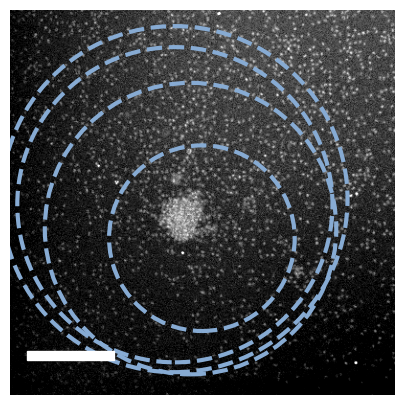

In [88]:

fig,axes = plt.subplots(figsize=(5,5))

norma = plt.Normalize(25000, 300000)
#palette = LinearSegmentedColormap.from_list('what', ['#4B4B4B', '#DBD08F','#BC2313'])
palette = sns.color_palette("Blues",as_cmap=True)
plt.imshow(img_file_lo[-1, 1, :,:], cmap='Greys_r', vmin=400, vmax=900)

for wid, wave in wave_df_lo.groupby('clTrackID'):
    wave_area = np.pi*(wave.circle_radius.max()**2)
    circle_wave = plt.Circle(wave.wave_centroid.values[0], wave.circle_radius.max()/um_per_px, color='#87ABD3', fill=False, linestyle='--', linewidth=3)
    axes.add_patch(circle_wave)
plt.gca().invert_yaxis()
axes.axis('off')

scalebar = AnchoredSizeBar(axes.transData,
                           200/um_per_px, '',  'lower left', 
                           pad=1,
                           color='white',
                           frameon=False,
                           size_vertical=10)

axes.add_artist(scalebar)

plt.savefig('supp6a-lo-den.png', dpi=300, bbox_inches='tight')
